In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
import scrapy
import string
import nltk
import re
import langid
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from contractions import contractions_list
from forex_python.converter import CurrencyRates

In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [2]:
#Load the data from Fundrazr
fundrazr = pd.read_csv("crowdfunding_fundrazr/crowdfunding_fundrazr/data6.csv")


In [3]:
def explore_dataset(df, show_histograms = True, show_boxplots = True):
    '''
    This EDA function gives important details about the features and samples of a dataset
    
    show_histogram: if true, the function plots a histogram for each numeric column
    show_boxplots: if true, the function plots a boxplot for each numeric column
    '''
    print("Number of columns in dataset: {0}".format(len(df.columns)))
    
    print("**********************************************************************************************\n")
    
    print("Column names:")
    print(df.columns.values)
    
    print("**********************************************************************************************\n")
    
    print("Here are the first 5 rows:")
    print(df.head())
    
    print("**********************************************************************************************\n")
    
    print(df.describe())
    
    
    print("**********************************************************************************************\n")
    
    #check for missing values
    print("Number of missing values per column:")
    print(df.isnull().sum())
    
    print("**********************************************************************************************\n")
    
    #Is the variable continuous, count, ordinal, categorial, missing, censored
    print("Column Types:")
    print(df.dtypes)
    
    print("**********************************************************************************************\n")
    
    #Is there inconsistent text entry in a column  
    check_text_data(df)
    
    
    #make histograms
    if show_histograms:
        plot_histograms(df)
    
    #make boxplots
    if show_boxplots:
        plot_boxplots(df)
    pass
    

In [4]:
def check_text_data(df):
    '''
    This function examines all the columns with text data to check for inconsistencies
    
    df: a dataframe
    return: None
    '''
    
    df_text_columns = get_text_columns(df)
    
    if df_text_columns.empty:
        print("there are no text columns")
    else:    
        #check for all the unique entries in each text column
        #for example: US and USA will appear as separate entries but mean the same thing
        for column in df_text_columns:
            print("\n====================================================================================\n")
            print("\nHere are the unique entries in column {0}:".format(df_text_columns[column].name))
            unique_entries = df_text_columns[column].unique()
            try:
                unique_entries.sort()
            except:
                pass
            print(unique_entries)
        
    return None    

In [5]:
def plot_histograms(df):
    '''
    Makes a histogram for each column with numeric data
    
    df: a dataframe
    '''
    df_numeric_columns = get_numeric_columns(df)
    for column in df_numeric_columns:
        sns.distplot(df_numeric_columns[column], kde=False)
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
    

In [6]:
def get_numeric_columns(df):
    '''
    Selects all columns with numeric data
    
    df: a dataframe
    return: a dataframe consisting only of the columns with numeric data
    '''
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_numeric_columns = df.select_dtypes(include=numerics).dropna()
    
    return df_numeric_columns
    

In [7]:
def get_text_columns(df):
    '''
    Selects all columns with text data
    
    df: a dataframe
    return: a dataframe consisting only of the columns with text data
    '''
    
    df_text_columns = df.select_dtypes(include=[object])
    return df_text_columns
    

In [8]:
def plot_boxplots(df):
    '''
    Makes a boxplot for each numeric variable in the dataframe
    
    df: a dataframe
    '''
    
    df_numeric_columns = get_numeric_columns(df)
    for column in df_numeric_columns:
        sns.boxplot(df_numeric_columns[column])
        #overlay the points on the boxplot
        sns.swarmplot(df_numeric_columns[column], color=".25")
        plt.show()
    

In [9]:
fundrazr = pd.read_csv("crowdfunding_fundrazr/crowdfunding_fundrazr/data6.csv")
fundrazr.sample(20)

,amount_raised,campaign_title,currency_type,end_date,goal,location,num_of_contributors,num_of_photos,story,url
1811,10598.0,Doug Corta Benefit Account,U.S. Dollar,NaN,25000.0,"Eagle, ID, US",44,1,This account has been started for the benefit ...,https://fundrazr.com/6icQd
1764,536.0,Its Magic (Mias Bucket List),Pound Sterling,NaN,5000.0,"Derby, GB",9,1,We are Fundraising for “Its Magic Mia’s Bucke...,https://fundrazr.com/anYF2
919,1491.0,Help Maria Gomez fight cancer.,U.S. Dollar,NaN,40000.0,"Miami, FL, US",18,1,Maria is an amazing human being that had breas...,https://fundrazr.com/fx4Lc
2642,145.0,2014 Haiti Medical Mission,U.S. Dollar,NaN,1500.0,"Port-au-Prince, HT",4,1,Being a nurse and the daughter of CJ and Betty...,https://fundrazr.com/3g762
2543,380.0,ANT & VIN'S ST. JUDE/MARIA FERRARI FUNDRAISER!,U.S. Dollar,NaN,50000.0,"Peekskill, NY, US",18,6,Anthony and Vinny have been great buddies sinc...,https://fundrazr.com/6g012
510,190.0,Mindy's Given It All To Animals and Now Needs ...,U.S. Dollar,NaN,10500.0,"Marysville, OH, US",4,8,Mindy Mallett is most generous and giving woma...,https://fundrazr.com/fortheloveofanimals
417,630.0,Giving Back to a Nurse in Need,U.S. Dollar,NaN,5000.0,"Tyler, TX, US",9,3,"My name is Jessica, and I have the pleasure of...",https://fundrazr.com/nurseinneed
1854,300.0,Help Christine in her time of NEED PLEASE,U.S. Dollar,NaN,1200.0,"Sacramento, CA, US",1,9,I am posting this in complete Desperation! Chr...,https://fundrazr.com/fqdp6
1203,735.0,Please help us find an answer for Emmanuel,Canadian Dollar,NaN,73000.0,"Halifax, NS, CA",16,1,Emmanuel is 16 months old. He was born in Port...,https://fundrazr.com/ez6K4
1553,1205.0,Help Sue Roll Home (Funds for Medical Equipment),Canadian Dollar,NaN,20000.0,"Sarnia, ON, CA",19,5,"In June, Sue VanEkeren was brought to Strathro...",https://fundrazr.com/ftRVb


Number of columns in dataset: 10
**********************************************************************************************

Column names:
['amount_raised' 'campaign_title' 'currency_type' 'end_date' 'goal'
 'location' 'num_of_contributors' 'num_of_photos' 'story' 'url']
**********************************************************************************************

Here are the first 5 rows:
   amount_raised                                   campaign_title  \
0          290.0  Give Wyatt the Earth's colors for his birthday!   
1          279.0                          Help Garrett See Colors   
2          340.0                                      I need help   
3          310.0                 Help Brendan Tucker see colours!   
4          500.0         CIDP and Menieres Disease financial help   

       currency_type end_date     goal             location  \
0        U.S. Dollar      NaN  50000.0      Brenham, TX, US   
1        U.S. Dollar      NaN  27000.0   Washington, DC, US 

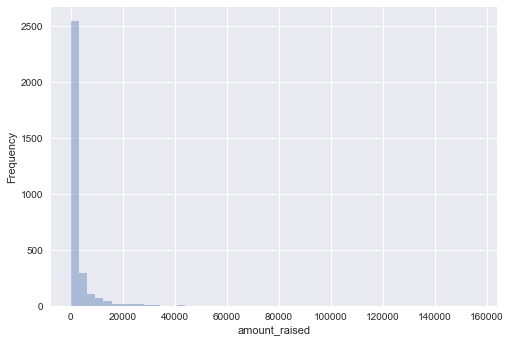

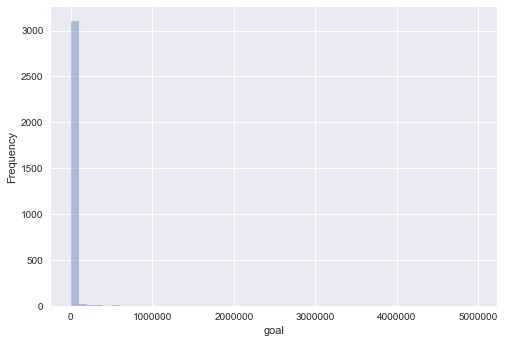

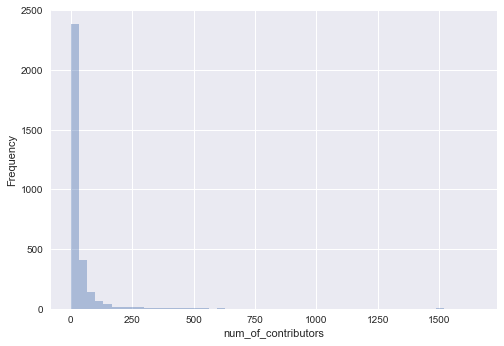

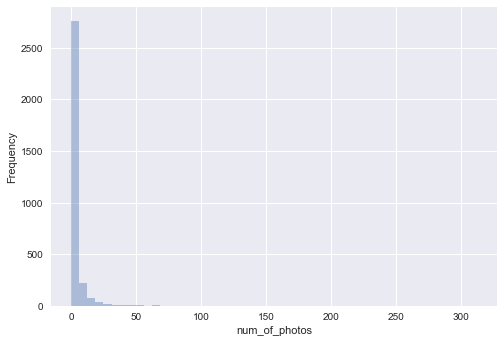

KeyboardInterrupt: 

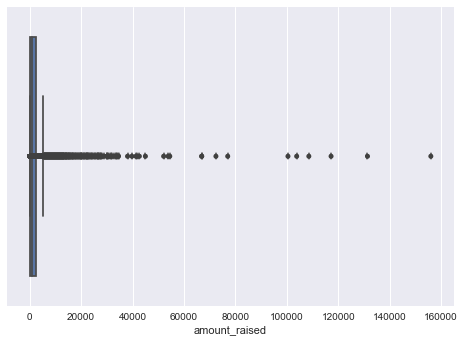

In [11]:
explore_dataset(fundrazr)

# Notes
* The amount_raised and goal are in a variety of currencies
* The stories are written in a variety of languages
* A lot of campaigns have no end date
* a campaigner has uploaded 312 photos which seems strange
* We'll need to convert end_date to datetime format
* not all the unique entries need to be checked for columns such as story
* should run a count of each of the values in end_date

In [17]:
def convert_to_USD(row):
    '''
    converts currency amount to USD
    '''
    c = CurrencyRates()
    currencies = {
                  'Australian Dollar': 'AUD', 'Canadian Dollar': 'CAD', 'Euro': 'EUR', 'Hong Kong Dollar': 'HKD',
                'Israeli New Sheqel': 'ILS', 'Mexican Peso': 'MXN', 'New Zealand Dollar': 'NZD', 'Philippine Peso': 'PHP',
                 'Pound Sterling': 'GBP', 'Russian Ruble': 'RUB', 'Singapore Dollar': 'SGD', 'Thai Baht': 'THB'
                }
    if row['currency_type'] == 'U.S. Dollar':
        return row['amount_raised']
    #, row['goal']
    else:
        return c.convert(currencies[row['currency_type']], 'USD', row['amount_raised'])
    #, 
    #c.convert(currencies[row['currency_type']], 'USD', row['goal'])

In [ ]:
fundrazr['amount_raised_USD'] = fundrazr.apply(convert_to_USD, axis=1)

In [10]:
def detect_language(text):
    '''
    text: a string
    returns: the most likely language that the string is written in
    '''
    try:
        return langid.classify(text)[0]
    except:
        #if there is no text
        return np.nan

In [ ]:
#it turns out that the stories and campaign titles come in a variety of language
fundrazr['lang_of_campaign'] = fundrazr['story'].apply(detect_language)
fundrazr.sample(20)

In [55]:
print(fundrazr.shape)
subset_fundrazr = fundrazr.iloc[:15]
subset_fundrazr

(3147, 11)


,amount_raised,campaign_title,currency_type,end_date,goal,location,num_of_contributors,num_of_photos,story,url,lang_of_campaign
0,290.0,Give Wyatt the Earth's colors for his birthday!,U.S. Dollar,NaN,50000.0,"Brenham, TX, US",4,1,WHY THIS IS IMPORTANT Over 300 million people ...,https://fundrazr.com/11Jgd5,en
1,279.0,Help Garrett See Colors,U.S. Dollar,NaN,27000.0,"Washington, DC, US",8,1,MY COLORBLIND STORY My kindergarten teacher us...,https://fundrazr.com/b1M8ma,en
2,340.0,I need help,U.S. Dollar,NaN,50000.0,"Зајечар, RS",10,6,"Могу ли добити вашу пажњу , и помоћи ? Патим о...",https://fundrazr.com/b189Y0,en
3,310.0,Help Brendan Tucker see colours!,Australian Dollar,NaN,50000.0,"Cooranbong, NSW, AU",8,1,WHAT IS ENCHROMA? Over 300 million people worl...,https://fundrazr.com/51HJed,en
4,500.0,CIDP and Menieres Disease financial help,U.S. Dollar,NaN,1000.0,"Fort Worth, US",2,5,"Hi I'm Johnny, I am an Air Force veteran. I wa...",https://fundrazr.com/81JqHe,en
5,349.0,Help Dad see his future in color,U.S. Dollar,NaN,34000.0,"Buckeye, AZ, US",3,7,"Many of you know my dad, Randy Greeson. Many o...",https://fundrazr.com/11Jbp9,en
6,1815.0,BioMats for Rain AND Dara!♥,U.S. Dollar,NaN,2200.0,"North Kingstown, US",61,20,"Hi, we are the # BCBabes from Breast Cancer Al...",https://fundrazr.com/91KC11,da
7,380.0,Help Sherwin see colors for his photography!,U.S. Dollar,NaN,52000.0,"Austin, TX, US",10,1,Who and Why? Sherwin Bartonico is an amazing p...,https://fundrazr.com/e1JzVe,en
8,5460.0,Please Help Michael Maberry a Victim of Assault,U.S. Dollar,NaN,15000.0,"Kansas City, MO, US",54,18,"I am Michael Maberry's wife, we have been marr...",https://fundrazr.com/michaelmaberryshealthfund,en
9,11225.0,Helping Jacob ~ Ewing's Sarcoma Sucks!,U.S. Dollar,NaN,2500.0,"Hermosa Beach, CA, US",88,3,Thank you for taking the time to visit this pa...,https://fundrazr.com/HelpingJacobConde,en


In [38]:
def remove_punctuation(text):
    '''
    text: a string
    returns: a string without any punctation
    '''
    words = word_tokenize(text)
    words_punc_removed = [word for word in words if word.lower() not in string.punctuation]
    return " ".join(words_punc_removed)

In [23]:
def get_only_words(text):
    '''
    text: a string
    returns: string without digits, punctuation and special characters
    '''

    return " ".join(re.findall("[a-zA-Z]+", text))

In [24]:
get_only_words("34 words in that sentence!")

'words in that sentence'

In [16]:
def expand_contractions(text):
    '''
    text: a string
    returns: a string without word contractions
    '''
    words = text.split()
    list_of_words = []
    for word in words:
        if word in contractions_list.keys():
            list_of_words.append(contractions_list[word])
        else:
            list_of_words.append(word)
            
    return " ".join(list_of_words)         
    

In [17]:
expand_contractions("we'll have to I'll wouldn't")

'we will have to I will would not'

In [18]:
expand_contractions("come on! :) geeez don't")

'come on! :) geeez do not'

In [11]:
word_tokenize("We'll I'll don't")

['We', "'ll", 'I', "'ll", 'do', "n't"]

In [6]:
print(remove_punctation("please help me!! I need you :)"))

please help me I need you


In [32]:
def remove_stopwords(text, language="english"):
    '''
    text: a string without punctation
    language: the language of the text
    returns: string without stopwords
    '''
    stopwords_ = stopwords.words(language)
    words_in_string = text.split()
    string_stopwords_removed = [word for word in words_in_string if word not in stopwords_]
    return " ".join(string_stopwords_removed)

In [33]:
print(remove_stopwords("the dog is with me forever"))

dog forever


In [34]:
def find_POS(word):
    '''
    word: a word
    returns: the part of speech of the word
    '''
    POS = nltk.pos_tag(word)[0][1]
    #adjective tags : "JJ", "JJR", "JJS"
    if POS.lower()[0] == 'j':
        return 'a'
    #adverb tags : "RB", "RBR", "RBS"
    elif POS.lower()[0] == 'r':
        return 'r'
    #verb tags: "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"
    elif POS.lower()[0] == 'v':
        return 'v'
    #noun tags: "NN", "NNS", "NNP", "NNPS"
    else:
        return 'n'

In [35]:
print(find_POS("mouse"))

n


In [36]:
def lemmatizer(text):
    '''
    text: a string without punctuation
    returns: lemmatized form of the string
    '''
    lemma_words = []
    wnl = WordNetLemmatizer()
    for word in text.split():
        POS = find_POS(word)
        lemma_words.append(wnl.lemmatize(word, POS))
    return " ".join(lemma_words)    

In [37]:
def lemmatize(text):
    '''
    text: a string of words
    returns: lemmatized form of the string
    '''
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(lemma_words)

In [4]:
print(lemmatize("I cared deeply about you"))

I cared deeply about you


In [5]:
print(lemmatize("the cats ran around the parks all night long"))

the cat ran around the park all night long


In [10]:
print(lemmatizer("the cats ran around the parks all night long"))

the cat run around the park all night long


In [25]:
print(lemmatizer("I cared deeply about you"))

I care deeply about you


# Notes
* lemmatizer() works better than lemmatize()

In [38]:
def preprocess_text(df, column_name, get_only_words_=True, remove_stopwords_=True, lemmatize=True):
    
    new_column_name = 'preprocessed_' + column_name
    df[new_column_name] = df[column_name]
    if get_only_words_:
        df[new_column_name] = df[new_column_name].apply(get_only_words) 
    if remove_stopwords_:
        df[new_column_name] = df[new_column_name].apply(remove_stopwords)
    if lemmatize:
        df[new_column_name] = df[new_column_name].apply(remove_stopwords)
    
    return df
    

In [39]:
print(preprocess_text(subset_fundrazr, 'campaign_title'))

    amount_raised                                   campaign_title  \
0           290.0  Give Wyatt the Earth's colors for his birthday!   
1           279.0                          Help Garrett See Colors   
2           340.0                                      I need help   
3           310.0                 Help Brendan Tucker see colours!   
4           500.0         CIDP and Menieres Disease financial help   
5           349.0                 Help Dad see his future in color   
6          1815.0                      BioMats for Rain AND Dara!♥   
7           380.0     Help Sherwin see colors for his photography!   
8          5460.0  Please Help Michael Maberry a Victim of Assault   
9         11225.0           Helping Jacob ~ Ewing's Sarcoma Sucks!   
10          500.0                   Anthony's Full Color Christmas   
11          390.0            Make Isaac Happy, Help Him See Color.   
12         3300.0         Raising medical operation fee for Bradly   
13          350.0   

/Users/davidbarnes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/davidbarnes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/davidbarnes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 